# <center>  Home Credit Indonesia Data Scientist Virtual Internship Program <center> 

# <center> Background <center> 

Home Credit is currently using various statistical methods and Machine Learning to make credit score predictions. This analysis to unlock the full potential of the data. By doing this, wll ensure that clients who are able to make repayments are not rejected when applying for loans, and that loans are given  with a principal, maturity, and repayment calendar that will empower their clients to be successful
    
## Actions
    
- Determine the goal, objectives, and metrics of the problem.
- Conduct information mining related to the initial data condition.
- Perform Data Cleaning and Data Processing.
- Conduct insight mining with reference to the set objectives.
- Perform modeling with various methods (including Logistic Regression) and their hyperparameters.
- Evaluate the modeling results.
- Measure the impact of modeling and business recommendations on the predetermined metrics.

# <center>  Import Libraries <center> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from sklearn.utils import resample 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from xgboost import XGBClassifier

# <center>  Load Dataset <center> 

## Train dataset

In [2]:
# data train (application_train)
df_train = pd.read_csv('application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# <center> Exploratory Data Analysis <center>

## Descriptive Statistics

In [117]:
print ( 'The train data has %d rows and %d columns'% df_train.shape)

The train data has 307511 rows and 122 columns


In [118]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [119]:
print(df_train['SK_ID_CURR'].nunique())
df_train.columns

307511


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [120]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

The data train (application train) has 307.511 unique information of loans with 122 features. The feature 'TARGET' defines 1 (client with payment difficulties), he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample. 0 - all other cases

### Basic Info Visualization

In [121]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

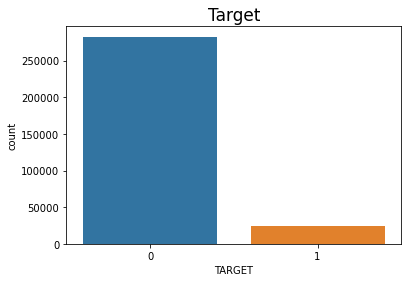

In [122]:
sns.countplot(data=df_train, x='TARGET')
plt.title ('Target', size = 17)
plt.show()

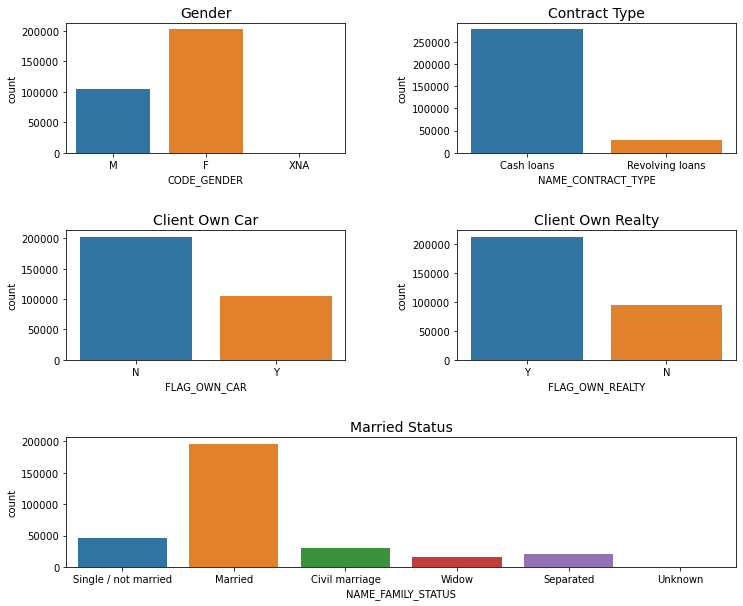

In [207]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

sns.countplot(data=df_train, x='CODE_GENDER', ax=axs[0, 0])
axs[0, 0].set_title('Gender', size=14)

sns.countplot(data=df_train, x='NAME_CONTRACT_TYPE', ax=axs[0, 1])
axs[0, 1].set_title('Contract Type', size=14)

sns.countplot(data=df_train, x='FLAG_OWN_CAR', ax=axs[1, 0])
axs[1, 0].set_title('Client Own Car', size=14)

sns.countplot(data=df_train, x='FLAG_OWN_REALTY', ax=axs[1, 1])
axs[1, 1].set_title('Client Own Realty', size=14)

axs[2, 0] = plt.subplot2grid((3, 2), (2, 0), colspan=2)
sns.countplot(data=df_train, x='NAME_FAMILY_STATUS', ax=axs[2, 0])
axs[2, 0].set_title('Married Status', size=14)

plt.show()

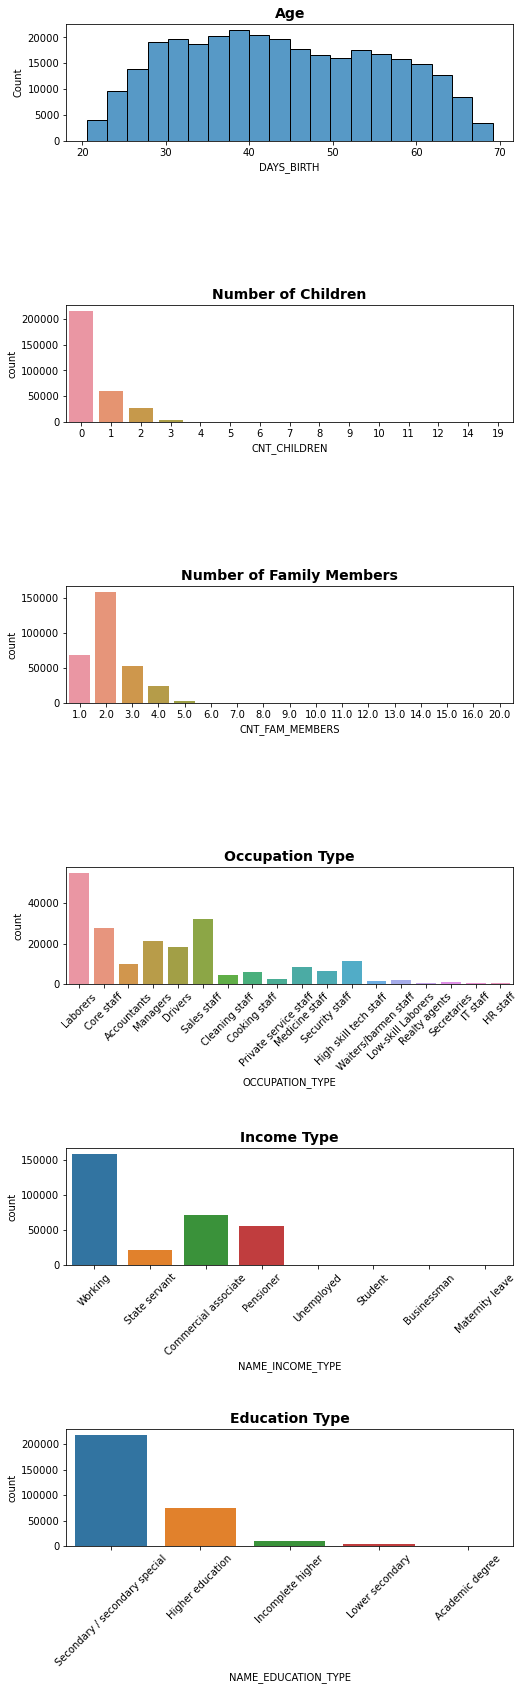

In [223]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(8, 28), gridspec_kw={'hspace': 1.4})

sns.histplot(data=df_train, x= abs(df_train['DAYS_BIRTH']/365), bins = 20, ax=axs[0])
axs[0].set_title('Age', size=14, weight = 'bold')

sns.countplot(data=df_train, x='CNT_CHILDREN', ax=axs[1])
axs[1].set_title('Number of Children', size=14,weight = 'bold')

sns.countplot(data=df_train, x='CNT_FAM_MEMBERS', ax=axs[2])
axs[2].set_title('Number of Family Members', size=14,weight = 'bold')

sns.countplot(data=df_train, x='OCCUPATION_TYPE', ax=axs[3])
axs[3].set_title('Occupation Type', size=14,weight = 'bold')
axs[3].tick_params(axis='x', labelrotation=45)

sns.countplot(data=df_train, x='NAME_INCOME_TYPE', ax=axs[4])
axs[4].set_title('Income Type', size=14,weight = 'bold')
axs[4].tick_params(axis='x', labelrotation=45)

sns.countplot(data=df_train, x='NAME_EDUCATION_TYPE', ax=axs[5])
axs[5].set_title('Education Type', size=14,weight = 'bold')
axs[5].tick_params(axis='x', labelrotation=45)

plt.show()

## Feature Selection Using ANOVA and Chi-Squared

#### Chi-Squared Test for Categorical Column
When both the target variable and predictors are categorical, a Chi-square test can be implemented to show the strenght of the correlation

In [283]:
app_train_chi = df_train.copy().select_dtypes('object')
result_df = pd.DataFrame(columns=['Feature', 'Chi-square', 'P-value'])
for col in app_train_chi.columns:
    
    # Create a contingency table between the categorical feature and the target
    contingency_table = pd.crosstab(df_train[col], df_train['TARGET'])
    
    # Calculate the chi-square statistic and p-value
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    result_df = result_df.append({'Feature': col, 'Chi-square': chi2, 'P-value': p}, ignore_index=True)

result_df = result_df.sort_values(by='Chi-square', ascending=False)
print(result_df)

                       Feature   Chi-square        P-value
11           ORGANIZATION_TYPE  1609.240636  5.224541e-299
9              OCCUPATION_TYPE  1402.846796  3.784500e-288
5             NAME_INCOME_TYPE  1253.470808  1.928146e-266
6          NAME_EDUCATION_TYPE  1019.213187  2.447681e-219
1                  CODE_GENDER   920.791334  1.129022e-200
7           NAME_FAMILY_STATUS   504.694083  7.744842e-107
8            NAME_HOUSING_TYPE   420.556190   1.099089e-88
0           NAME_CONTRACT_TYPE   293.150542   1.023515e-65
2                 FLAG_OWN_CAR   146.656018   9.330994e-34
14          WALLSMATERIAL_MODE   139.235314   1.453180e-27
4              NAME_TYPE_SUITE    32.825315   1.132931e-05
13              HOUSETYPE_MODE    27.632556   9.992328e-07
15         EMERGENCYSTATE_MODE    23.678150   1.138680e-06
12          FONDKAPREMONT_MODE    16.809897   7.732982e-04
10  WEEKDAY_APPR_PROCESS_START    15.387557   1.744737e-02
3              FLAG_OWN_REALTY    11.575827   6.681470e-

#### ANOVA Test for Numerical Column
ANOVA stands for Analysis Of Variance. Using ANOVA to test if the mean of the numerical predictor is significantly different across the categories of the categorical target.

In [341]:
import pingouin as pg

num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('TARGET')

# perform ANOVA tests for each numerical feature
results = []
for col in num_cols:
    aov = pg.anova(data=df_train, dv=col, between='TARGET')
    results.append([col, aov['F'][0], aov['p-unc'][0]])

# create table of results
anova_table = pd.DataFrame(results, columns=['Feature', 'F-value', 'p-value'])
anova_table = anova_table.sort_values('p-value').reset_index(drop=True)

print(anova_table[:20])


                        Feature      F-value        p-value
0                  EXT_SOURCE_3  8153.346064   0.000000e+00
1                  EXT_SOURCE_2  8110.573549   0.000000e+00
2                  EXT_SOURCE_1  3315.682630   0.000000e+00
3                    DAYS_BIRTH  1893.976087   0.000000e+00
4   REGION_RATING_CLIENT_W_CITY  1144.461405  2.078455e-250
5          REGION_RATING_CLIENT  1070.491250  2.172433e-234
6        DAYS_LAST_PHONE_CHANGE   940.484389  3.188161e-206
7               DAYS_ID_PUBLISH   816.396507  2.527524e-179
8        REG_CITY_NOT_WORK_CITY   801.742167  3.805463e-176
9                FLAG_EMP_PHONE   651.563766  1.442660e-143
10                DAYS_EMPLOYED   622.071742  3.631173e-137
11       REG_CITY_NOT_LIVE_CITY   607.281571  5.894986e-134
12              FLAG_DOCUMENT_3   605.938369  1.153611e-133
13            DAYS_REGISTRATION   542.753029  6.036553e-120
14              AMT_GOODS_PRICE   483.649984  4.153757e-107
15   REGION_POPULATION_RELATIVE   426.75

## Bivariate Analysis
#### Categorical Features (Top 5) vs Target

In [7]:
pd.set_option('display.max_rows', None)
or_type = df_train.groupby(by=['ORGANIZATION_TYPE', 'TARGET'], as_index = False)['SK_ID_CURR'].count()
organization_type = or_type.sort_values(by='ORGANIZATION_TYPE', ascending=True)
print(organization_type)

          ORGANIZATION_TYPE  TARGET  SK_ID_CURR
0               Advertising       0         394
1               Advertising       1          35
2               Agriculture       0        2197
3               Agriculture       1         257
4                      Bank       0        2377
5                      Bank       1         130
6    Business Entity Type 1       0        5497
7    Business Entity Type 1       1         487
8    Business Entity Type 2       0        9653
9    Business Entity Type 2       1         900
10   Business Entity Type 3       0       61669
11   Business Entity Type 3       1        6323
13                 Cleaning       1          29
12                 Cleaning       0         231
14             Construction       0        5936
15             Construction       1         785
16                  Culture       0         358
17                  Culture       1          21
18              Electricity       0         887
19              Electricity       1     

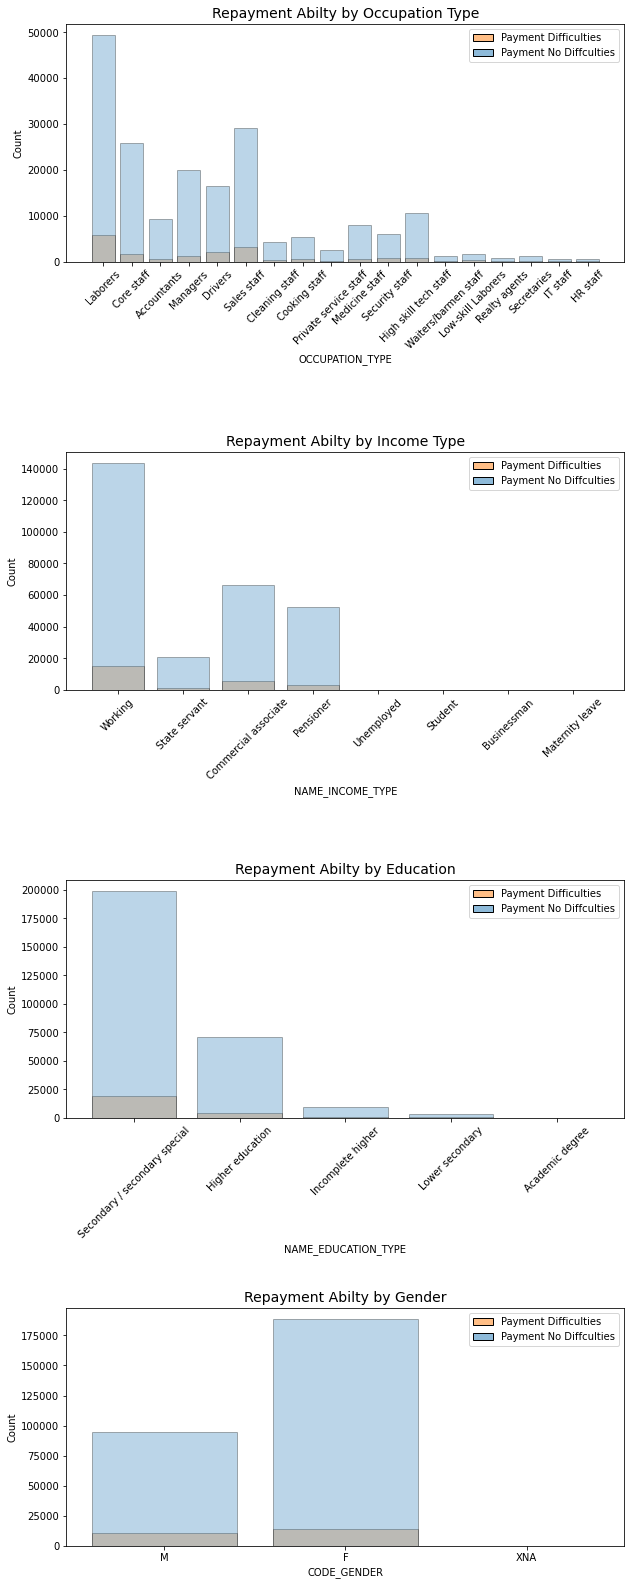

In [276]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 28), gridspec_kw={'hspace': 0.8})

sns.histplot(data=df_train, x='OCCUPATION_TYPE',hue = 'TARGET', hue_order=[0, 1], ax=axs[0], shrink = 0.8)
axs[0].set_title('Repayment Abilty by Occupation Type', size=14)
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].legend(['Payment Difficulties', 'Payment No Diffculties'])

sns.histplot(data=df_train, x='NAME_INCOME_TYPE',hue='TARGET', hue_order=[0, 1], ax=axs[1], shrink = 0.8)
axs[1].set_title('Repayment Abilty by Income Type', size=14)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].legend(['Payment Difficulties', 'Payment No Diffculties'])

sns.histplot(data=df_train, x='NAME_EDUCATION_TYPE',hue ='TARGET', hue_order=[0, 1], ax=axs[2], shrink = 0.8)
axs[2].set_title('Repayment Abilty by Education', size=14)
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].legend(['Payment Difficulties', 'Payment No Diffculties'])

sns.histplot(data=df_train, x='CODE_GENDER', hue='TARGET', hue_order=[0, 1],ax=axs[3], shrink = 0.8)
axs[3].set_title('Repayment Abilty by Gender', size=14)
axs[3].legend(['Payment Difficulties', 'Payment No Diffculties'])

for ax in axs:
    for patch in ax.patches:
        if patch.get_height() > 0:
            patch.set_alpha(0.3)
            
plt.show()

#### Numerical Features (Top 5) vs Target

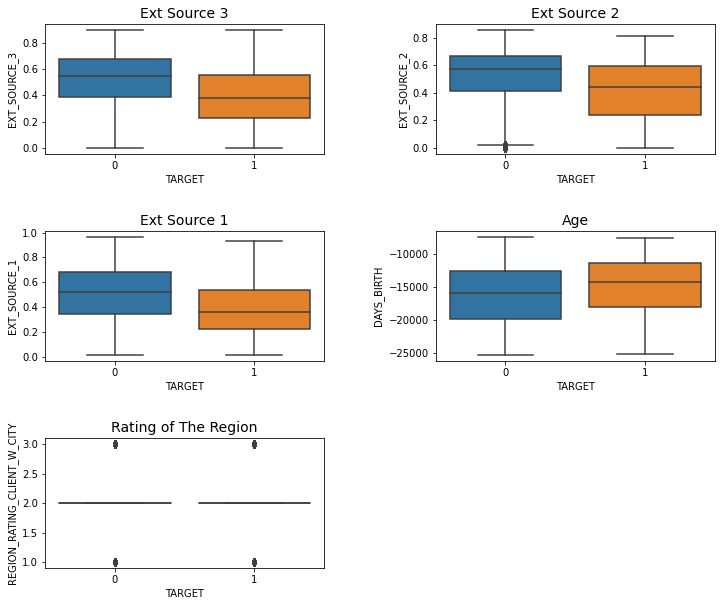

In [300]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

sns.boxplot(x='TARGET', y = 'EXT_SOURCE_3',data=df_train, ax=axs[0, 0])
axs[0, 0].set_title('Ext Source 3', size=14)

sns.boxplot(x='TARGET', y = 'EXT_SOURCE_2', data=df_train,ax=axs[0, 1])
axs[0, 1].set_title('Ext Source 2', size=14)

sns.boxplot(x='TARGET', y = 'EXT_SOURCE_1', data=df_train,ax=axs[1, 0])
axs[1, 0].set_title('Ext Source 1', size=14)

sns.boxplot(x='TARGET', y = 'DAYS_BIRTH', data=df_train, ax=axs[1, 1])
axs[1, 1].set_title('Age', size=14)

sns.boxplot(x='TARGET', y = 'REGION_RATING_CLIENT_W_CITY', data=df_train, ax=axs[2, 0])
axs[2, 0].set_title('Rating of The Region', size=14)

axs[2,1].remove()
axs[2,1].set_axis_off()

plt.show()

## Multivariate Analysis

#### Based on Name Contract Type

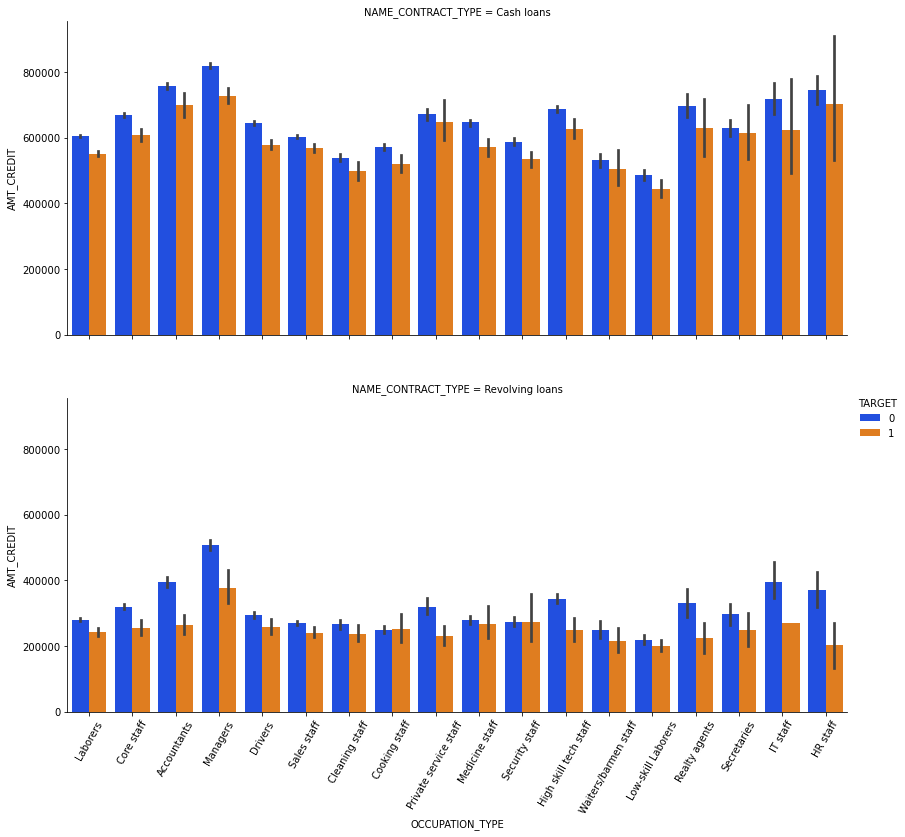

In [330]:
fig = sns.catplot(x = 'OCCUPATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            row = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'bright',
            data = df_train,
            height=8, aspect=1.5)
fig.fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.2)
fig.set_xticklabels(rotation=60)
plt.show()

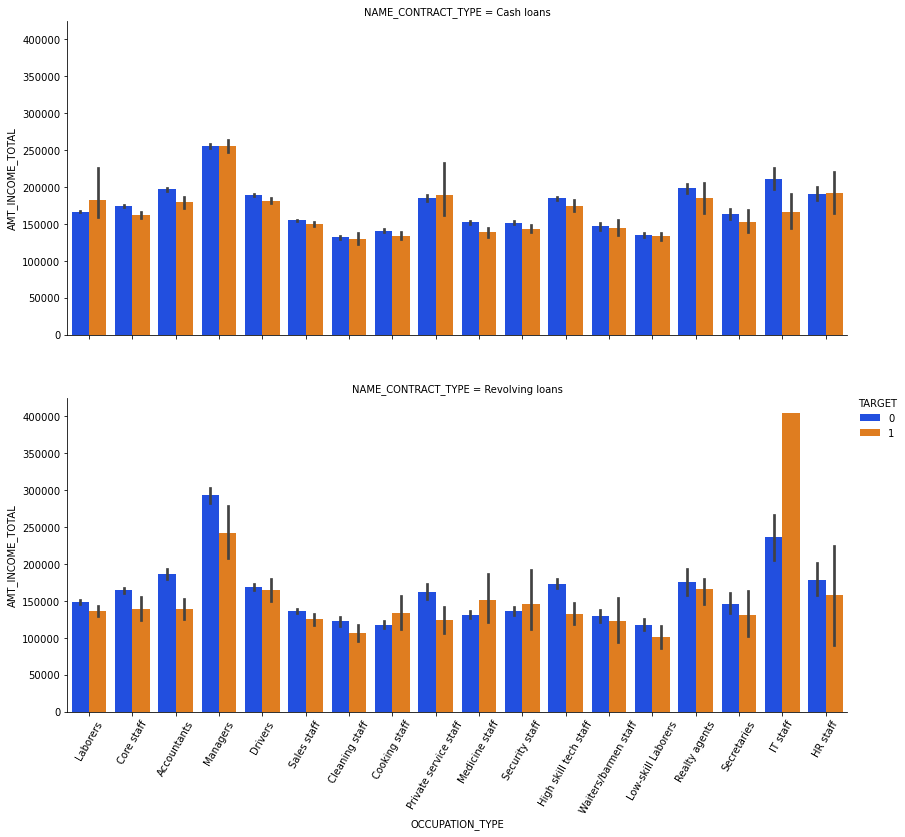

In [331]:
fig = sns.catplot(x = 'OCCUPATION_TYPE',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            row = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'bright',
            data = df_train,
            height=8, aspect=1.5)
fig.fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.2)
fig.set_xticklabels(rotation=60)
plt.show()

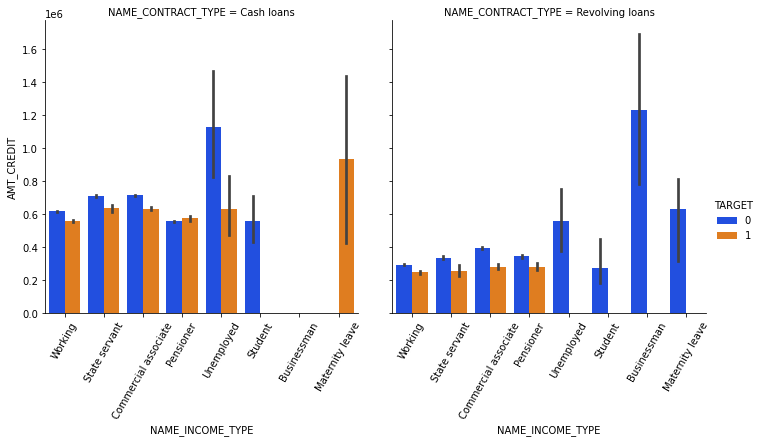

In [313]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'bright',
            data = df_train)

fig.set_xticklabels(rotation=60)
plt.show()

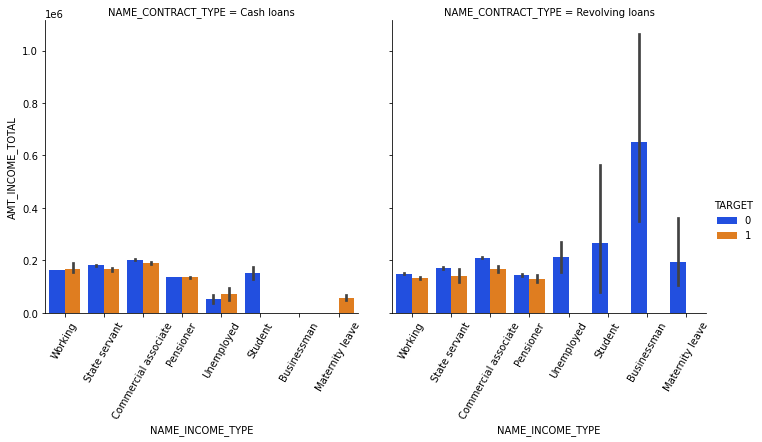

In [317]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'bright',
            data = df_train)

fig.set_xticklabels(rotation=60)
plt.show()

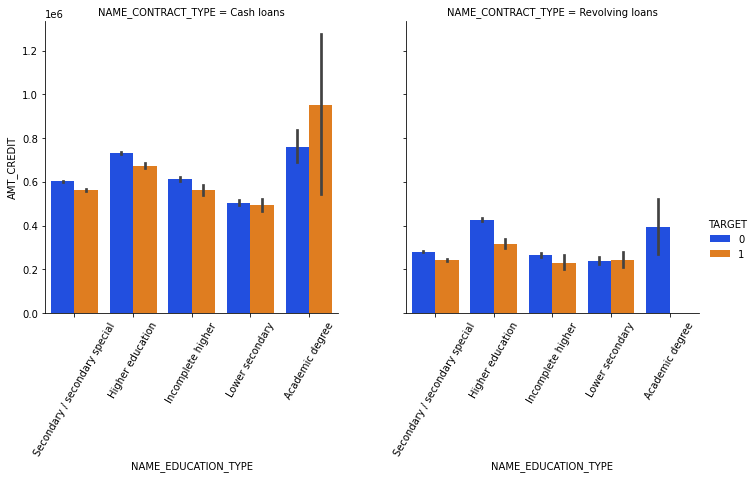

In [316]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'bright',
            data = df_train)

fig.set_xticklabels(rotation=60)
plt.show()

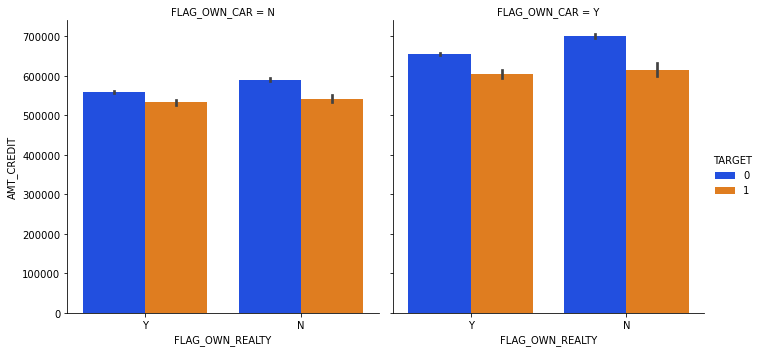

In [4]:
fig = sns.catplot(x = 'FLAG_OWN_REALTY',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'bright',
            data = df_train)
plt.show()

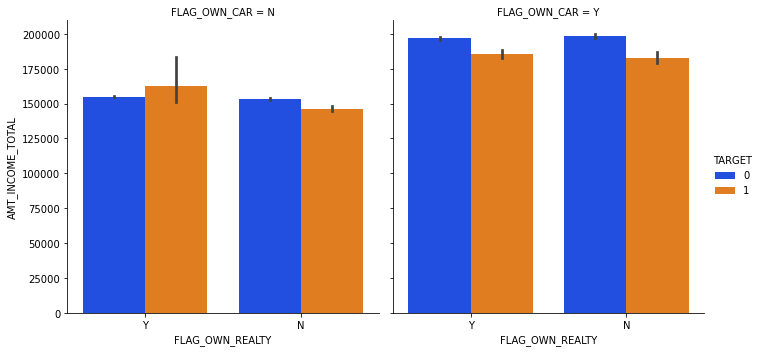

In [5]:
fig = sns.catplot(x = 'FLAG_OWN_REALTY',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'bright',
            data = df_train)

plt.show()

# <center> Data Cleaning <center>

## Cleaning Training Data
### Duplicated Data

In [67]:
# Checking Duplicated Data
df_train.duplicated().sum()

0

In [68]:
# Checking Missing Value
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Missing and Imputation

In [69]:
# Checking Missing Value

pd.set_option('display.max_rows', None)
missing_val = pd.DataFrame(df_train.isnull().sum(), columns =['Total Null Values'])
missing_val ['Percentage'] = (df_train.isnull().sum()/df_train.shape[0]*100)
print(missing_val.sort_values(by = 'Percentage', ascending = False). reset_index())
print("There are " + str(missing_val.loc[missing_val['Total Null Values'] >0].shape[0]) + "column have missing Value")

                            index  Total Null Values  Percentage
0                 COMMONAREA_MEDI             214865   69.872297
1                  COMMONAREA_AVG             214865   69.872297
2                 COMMONAREA_MODE             214865   69.872297
3        NONLIVINGAPARTMENTS_MODE             213514   69.432963
4         NONLIVINGAPARTMENTS_AVG             213514   69.432963
5        NONLIVINGAPARTMENTS_MEDI             213514   69.432963
6              FONDKAPREMONT_MODE             210295   68.386172
7           LIVINGAPARTMENTS_MODE             210199   68.354953
8            LIVINGAPARTMENTS_AVG             210199   68.354953
9           LIVINGAPARTMENTS_MEDI             210199   68.354953
10                  FLOORSMIN_AVG             208642   67.848630
11                 FLOORSMIN_MODE             208642   67.848630
12                 FLOORSMIN_MEDI             208642   67.848630
13               YEARS_BUILD_MEDI             204488   66.497784
14               YEARS_BU

In [70]:
# We drop column that has > 50% missing value
df_train.drop(missing_val[missing_val['Percentage'] > 50].index, axis=1, inplace=True)
df_train.shape

(307511, 81)

In [71]:
df_train.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

In [72]:
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [73]:
df_train.shape

(307511, 81)

In [74]:
null = df_train.isnull().sum().reset_index()
print (null)
null_table = null.loc[null[0] > 0]
print('\n')
print('Number of column have missing value ', null_table.shape)


                           index       0
0                     SK_ID_CURR       0
1                         TARGET       0
2             NAME_CONTRACT_TYPE       0
3                    CODE_GENDER       0
4                   FLAG_OWN_CAR       0
5                FLAG_OWN_REALTY       0
6                   CNT_CHILDREN       0
7               AMT_INCOME_TOTAL       0
8                     AMT_CREDIT       0
9                    AMT_ANNUITY      12
10               AMT_GOODS_PRICE     278
11               NAME_TYPE_SUITE    1292
12              NAME_INCOME_TYPE       0
13           NAME_EDUCATION_TYPE       0
14            NAME_FAMILY_STATUS       0
15             NAME_HOUSING_TYPE       0
16    REGION_POPULATION_RELATIVE       0
17                    DAYS_BIRTH       0
18                 DAYS_EMPLOYED       0
19             DAYS_REGISTRATION       0
20               DAYS_ID_PUBLISH       0
21                    FLAG_MOBIL       0
22                FLAG_EMP_PHONE       0
23              

#### Replace XNA Values with Nan

In [75]:
# Checking column information from feature with 'object' type
for col in df_train.select_dtypes(include = ["object"]).columns:
    print(f'''Value count column {col}:''')
    print(df_train[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int

Code_Gender and Organization_type has XNA value

In [76]:
df_train.CODE_GENDER.replace ('XNA', np.nan, inplace = True)
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace('XNA', np.nan)

In [77]:
for col in df_train.select_dtypes(include = ["object"]).columns:
    print(f'''Value count column {col}:''')
    print(df_train[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F    202448
M    105059
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Value count co

#### Imputation
Checking the distributiin of numerical features to determine the approach to fill the missing value

In [78]:
numerical_feat = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_GOODS_PRICE',
                  'AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

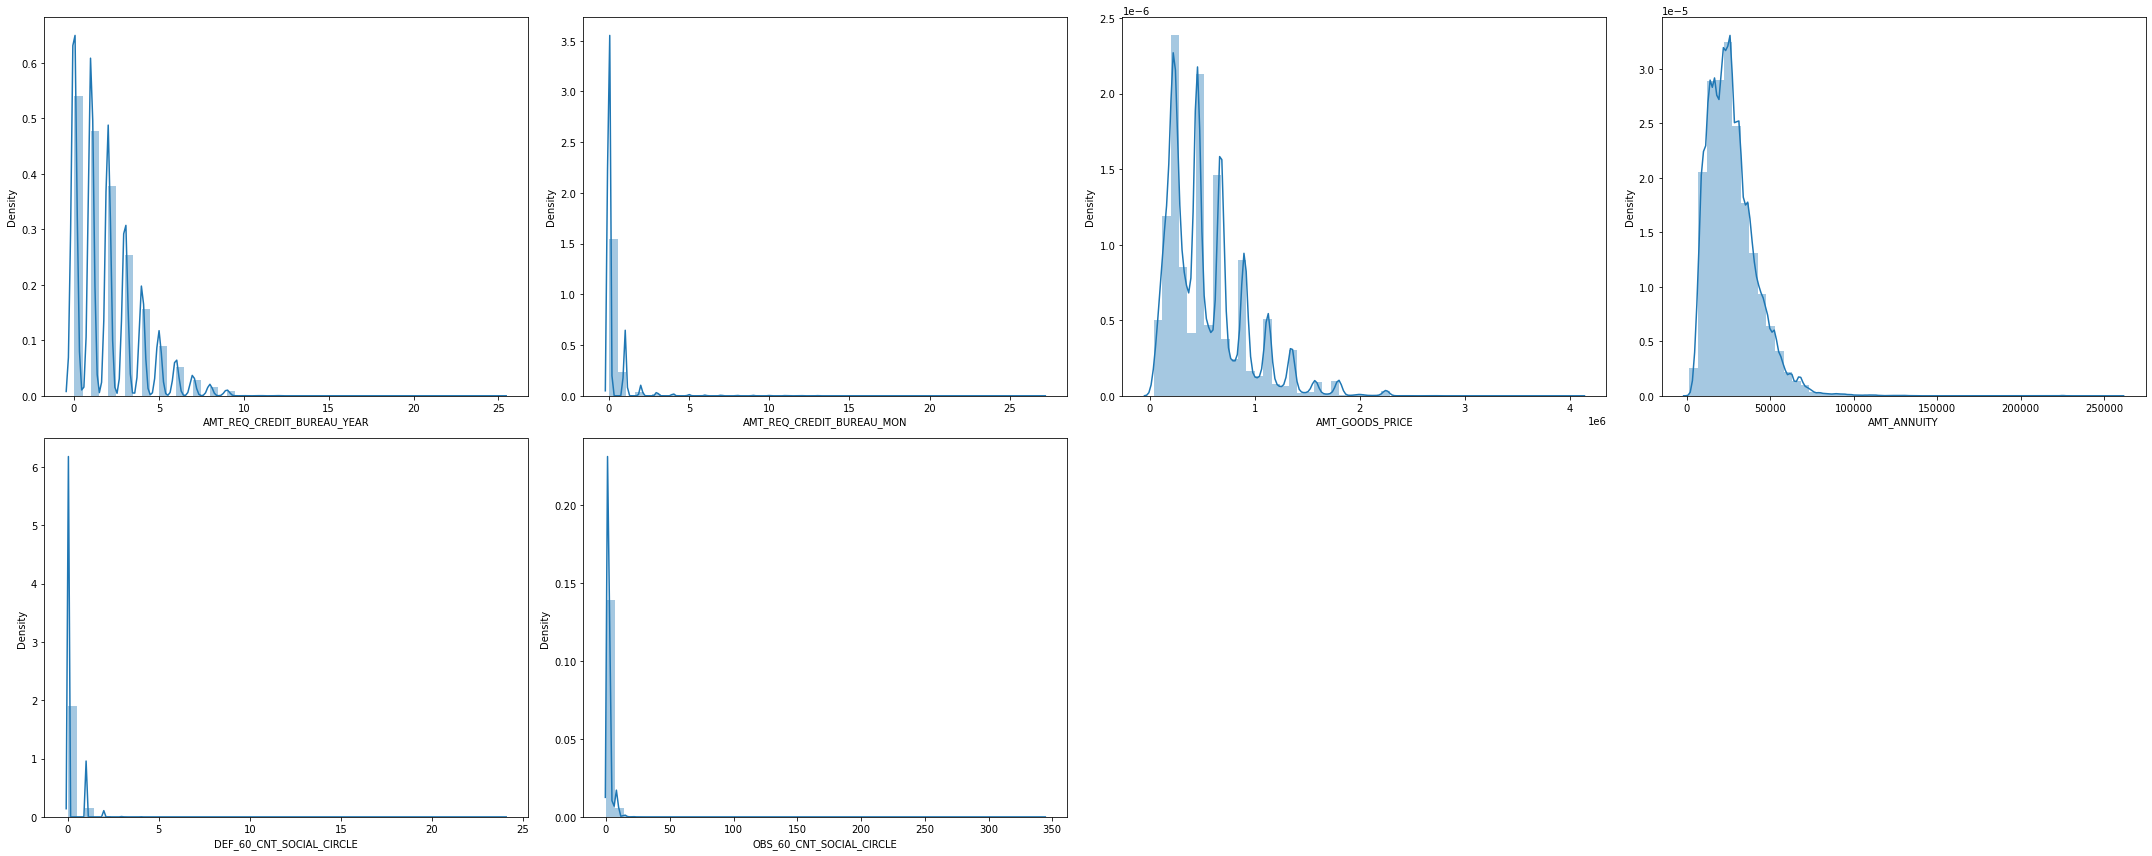

In [15]:
plt.figure(figsize=(30,12))
features = numerical_feat
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_train[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

The distribution of numerical features is skewed, then using median would be a better choice as it is more robust to outliers

In [79]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
numerical_columns = df_train.select_dtypes(exclude=['object']).columns

def categorical_imput (df_train):
    for i in categorical_columns:
        df_train[i] = df_train[i].fillna(df_train[i].mode()[0])
    return df_train

def numerical_imput (df_train):
    for i in numerical_columns:
        df_train[i] = df_train[i].fillna(df_train[i].median())
    return df_train
        
def transform_feature(df_train):
    df_train = categorical_imput(df_train)
    df_train = numerical_imput(df_train)
    return df_train

df_train = transform_feature(df_train)
pd.set_option("display.max_columns", None)
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df_train.isnull().values.any()

False

## Feature Engineering

In [81]:
df_train['AGE'] = abs(df_train['DAYS_BIRTH']/365)
df_train.drop(columns='DAYS_BIRTH', inplace=True)

In [82]:
df_train['YEARS_EMPLOYED'] = abs(df_train['DAYS_EMPLOYED']/365)
df_train.drop(columns='DAYS_EMPLOYED', inplace=True)

In [83]:
df_train['YEARS_REGISTRATION'] = abs(df_train['DAYS_REGISTRATION']/365)
df_train.drop(columns='DAYS_REGISTRATION', inplace=True)

In [84]:
df_train["YEARS_ID_PUBLISH"] = abs(df_train['DAYS_ID_PUBLISH']/365)
df_train.drop(columns = 'DAYS_ID_PUBLISH',inplace =True)

In [85]:
df_train["YEARS_LAST_PHONE_CHANGE"] = abs(df_train['DAYS_LAST_PHONE_CHANGE']/365)
df_train.drop(columns = 'DAYS_LAST_PHONE_CHANGE',inplace =True)

In [86]:
pd.set_option("display.max_columns", None)
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,26.939726,6.676712,1.690411
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137


## Detecting Outlier

Outlier won'be removed because it can provide valuable insight in some cases. Removing outliers without proper justification can lead to a loss of valuable information and can also introduce bias into the analysis.

### Saving clean training file

In [87]:
df_train.to_csv('Df_trainclean.csv', index = False)

In [36]:
df_trainclean = pd.read_csv('Df_trainclean.csv')

In [37]:
df_trainclean.shape

(307511, 81)

## Feature Encoding

In [38]:
df_trainclean.dtypes.value_counts()

int64      38
float64    30
object     13
dtype: int64

Assuming all categorical feature is nominal categorical, so we use label encoder

In [39]:
le = LabelEncoder()

# Encode categorical features
for col in df_trainclean.select_dtypes (include = ['object']).columns:
    df_trainclean[col] = le.fit_transform(df_trainclean[col])

In [40]:
pd.set_option("display.max_columns", None)
df_trainclean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,26.939726,6.676712,1.690411
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137


In [41]:
df_trainclean.dtypes.value_counts()

int64      38
float64    30
int32      13
dtype: int64

## Feature Selection

In [42]:
df_trainclean = df_trainclean.drop(['SK_ID_CURR'], axis = 1)

In [43]:
df_trainclean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,26.939726,6.676712,1.690411
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137


In [11]:
x = df_trainclean.drop(['TARGET'],axis = 1)
y = df_trainclean['TARGET']

In [12]:
# feature selection
selector = SelectKBest(mutual_info_classif, k=20)
fit = selector.fit(x,y)

selected_features = selector.get_support(indices=True)
scores = selector.scores_[selected_features]

selected_df = pd.DataFrame({'feature': x.columns[selected_features], 'score': scores})
selected_df = selected_df.sort_values('score', ascending=False)
selected_df = selected_df.reset_index(drop=True) 

print(selected_df)

                         feature     score
0                     FLAG_MOBIL  0.080892
1               FLAG_CONT_MOBILE  0.059620
2                FLAG_DOCUMENT_3  0.056759
3                 FLAG_EMP_PHONE  0.055839
4                FLAG_OWN_REALTY  0.055369
5              NAME_HOUSING_TYPE  0.051844
6                NAME_TYPE_SUITE  0.039396
7            NAME_EDUCATION_TYPE  0.039033
8               NAME_INCOME_TYPE  0.028837
9           REGION_RATING_CLIENT  0.027048
10   REGION_RATING_CLIENT_W_CITY  0.026377
11                FLOORSMAX_MODE  0.025143
12                 FLOORSMAX_AVG  0.024643
13                FLOORSMAX_MEDI  0.024520
14               OCCUPATION_TYPE  0.023076
15               CNT_FAM_MEMBERS  0.023060
16                   CODE_GENDER  0.021095
17                  FLAG_OWN_CAR  0.020308
18            NAME_FAMILY_STATUS  0.019650
19  YEARS_BEGINEXPLUATATION_MODE  0.016257


In [15]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores = featureScores.reset_index(drop=True) 
featureScores= featureScores.sort_values(by=['Score'], ascending=False)


print(featureScores)

The features that correlate well with target feature:

                        Features         Score
8                AMT_GOODS_PRICE  1.223080e+08
6                     AMT_CREDIT  7.669987e+07
5               AMT_INCOME_TOTAL  1.624102e+06
75                YEARS_EMPLOYED  5.353765e+05
7                    AMT_ANNUITY  3.913092e+05
..                           ...           ...
36   YEARS_BEGINEXPLUATATION_AVG  1.229669e-02
38  YEARS_BEGINEXPLUATATION_MODE  1.108830e-02
68    AMT_REQ_CREDIT_BUREAU_HOUR  1.832008e-03
18              FLAG_CONT_MOBILE  7.863447e-05
15                    FLAG_MOBIL  2.855786e-07

[79 rows x 2 columns]


In [16]:
selector2 = SelectKBest(f_regression, k=40)
fit2 = selector2.fit(x,y)

selected_features2 = selector2.get_support(indices=True)
scores2 = selector2.scores_[selected_features2]

selected_df2 = pd.DataFrame({'feature': x.columns[selected_features2], 'score': scores2})
selected_df2 = selected_df2.sort_values('score', ascending=False)
selected_df2 = selected_df2.reset_index(drop=True) 

print(selected_df2)

                        feature        score
0                  EXT_SOURCE_2  8109.633923
1                  EXT_SOURCE_3  7659.288339
2                           AGE  1893.976087
3   REGION_RATING_CLIENT_W_CITY  1144.461405
4          REGION_RATING_CLIENT  1070.491250
5       YEARS_LAST_PHONE_CHANGE   940.478790
6                   CODE_GENDER   923.285127
7           NAME_EDUCATION_TYPE   922.808544
8              YEARS_ID_PUBLISH   816.396507
9        REG_CITY_NOT_WORK_CITY   801.742167
10               YEARS_EMPLOYED   682.122391
11             NAME_INCOME_TYPE   675.848098
12               FLAG_EMP_PHONE   651.563766
13       REG_CITY_NOT_LIVE_CITY   607.281571
14              FLAG_DOCUMENT_3   605.938369
15           YEARS_REGISTRATION   542.753029
16              AMT_GOODS_PRICE   483.549155
17                FLOORSMAX_AVG   477.753415
18               FLOORSMAX_MEDI   472.223600
19               FLOORSMAX_MODE   453.567496
20   REGION_POPULATION_RELATIVE   426.756028
21        

We use mutual information method for feature selection when dealing with a mix of categorical and numerical features, as it can capture complex relationships between features and the target variable.

In [44]:
col_corr = selected_df['feature'].tolist()
col_corr

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_3',
 'FLAG_EMP_PHONE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'YEARS_BEGINEXPLUATATION_MODE']

In [45]:
# cs = clean and selection
df_traincs = df_trainclean[col_corr]
target = df_trainclean['TARGET']
df_traincs = pd.concat([df_traincs,target], axis =1)

In [46]:
pd.set_option("display.max_columns", None)
df_traincs.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_EMP_PHONE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLOORSMAX_MODE,FLOORSMAX_AVG,FLOORSMAX_MEDI,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_MODE,TARGET
0,1,1,1,1,1,1,6,4,7,2,2,0.0833,0.0833,0.0833,8,1.0,1,0,3,0.9722,1
1,1,1,1,1,0,1,1,1,4,1,1,0.2917,0.2917,0.2917,3,2.0,0,0,1,0.9851,0
2,1,1,0,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,8,1.0,1,1,3,0.9816,0
3,1,1,1,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,8,2.0,0,0,0,0.9816,0
4,1,1,0,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,3,1.0,1,0,3,0.9816,0


In [47]:
df_traincs.shape

(307511, 21)

In [48]:
df_traincs['CNT_FAM_MEMBERS'] = df_traincs['CNT_FAM_MEMBERS'].astype('int64')
pd.set_option("display.max_columns", None)
df_traincs.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_EMP_PHONE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLOORSMAX_MODE,FLOORSMAX_AVG,FLOORSMAX_MEDI,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_MODE,TARGET
0,1,1,1,1,1,1,6,4,7,2,2,0.0833,0.0833,0.0833,8,1,1,0,3,0.9722,1
1,1,1,1,1,0,1,1,1,4,1,1,0.2917,0.2917,0.2917,3,2,0,0,1,0.9851,0
2,1,1,0,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,8,1,1,1,3,0.9816,0
3,1,1,1,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,8,2,0,0,0,0.9816,0
4,1,1,0,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,3,1,1,0,3,0.9816,0


In [49]:
numeric_col = df_traincs.select_dtypes(include=['float64']).columns.tolist()
numeric_col

['FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE']

For the column list above will be doing scalling numerical

In [50]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df_traincs[numeric_col] = scaler.fit_transform(df_traincs[numeric_col])

In [51]:
pd.set_option("display.max_columns", None)
df_traincs.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_EMP_PHONE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLOORSMAX_MODE,FLOORSMAX_AVG,FLOORSMAX_MEDI,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_MODE,TARGET
0,1,1,1,1,1,1,6,4,7,2,2,0.0833,0.0833,0.0833,8,1,1,0,3,0.9722,1
1,1,1,1,1,0,1,1,1,4,1,1,0.2917,0.2917,0.2917,3,2,0,0,1,0.9851,0
2,1,1,0,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,8,1,1,1,3,0.9816,0
3,1,1,1,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,8,2,0,0,0,0.9816,0
4,1,1,0,1,1,1,6,4,7,2,2,0.1667,0.1667,0.1667,3,1,1,0,3,0.9816,0


In [52]:
df_traincs.to_csv('df_traincleaningselection.csv', index = False)

In [3]:
df_traincs = pd.read_csv('df_traincleaningselection.csv')

In [4]:
df_traincs.shape

(307511, 21)

In [5]:
df_traincs['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Handling Imbalance Dataset

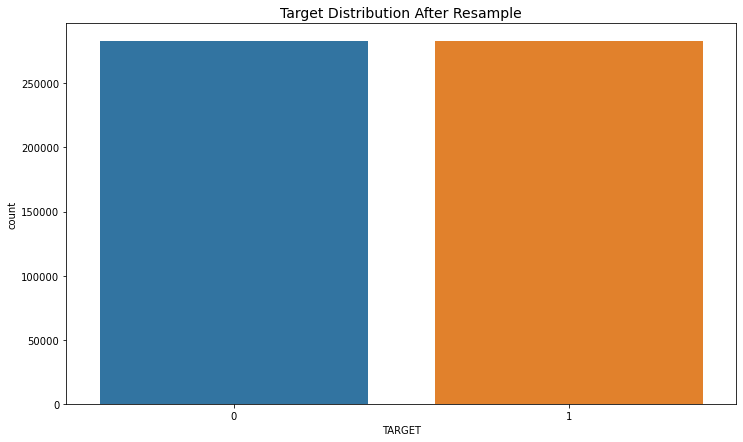

In [6]:
# Make 2 DataFrame from majority and minority class 
df_majority = df_traincs[(df_traincs['TARGET']==0)] 
df_minority = df_traincs[(df_traincs['TARGET']==1)] 

# Upsample kelas minority 
df_minority_upsampled = resample(df_minority,replace=True,n_samples= 282686, random_state=42)  

# Combine both class 
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
fig = plt.figure(figsize = (12,7))
sns.countplot(data = df_upsampled, x = 'TARGET')
plt.title('Target Distribution After Resample', fontsize=14)
plt.show()

In [7]:
df_upsampled['TARGET'].value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

# <center> Modelling <center>

In [8]:
# X, Y variabel for modelling (top 20 features)
col_corr2 = ['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_3',
 'FLAG_EMP_PHONE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'YEARS_BEGINEXPLUATATION_MODE']
x_blnc = df_upsampled[col_corr2]
y_blnc = df_upsampled['TARGET']

In [9]:
x_blnc.shape

(565372, 20)

In [10]:
y_blnc.shape

(565372,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_blnc, y_blnc, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(452297, 20)
(113075, 20)
(452297,)
(113075,)


## Logistic Regression

In [13]:
# train the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
print(logreg)

LogisticRegression(random_state=42)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# prediksi train data
y_train_pred_log = logreg.predict(X_train)

# print classification report
print('Report Logistic Regression Training Model:')
report = classification_report(y_train, y_train_pred_log)

print(report)

Report Logistic Regression Training Model:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58    226185
           1       0.59      0.62      0.60    226112

    accuracy                           0.59    452297
   macro avg       0.59      0.59      0.59    452297
weighted avg       0.59      0.59      0.59    452297



[[126643  99542]
 [ 84886 141226]]


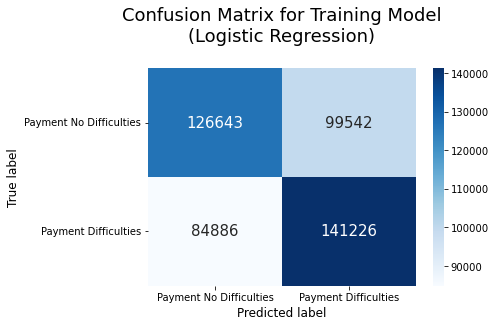

In [15]:
cf_matrix = confusion_matrix(y_train, y_train_pred_log)
labels = ['Payment No Difficulties', 'Payment Difficulties']
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True,annot_kws={'size': 15}, fmt='d',cmap = 'Blues',xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [17]:
# prediksi test data
y_test_pred_log = logreg.predict(X_test)

# print classification report
print('Report Logistic Regression Testing Model:')
report = classification_report(y_test, y_test_pred_log)

print(report)

Report Logistic Regression Testing Model:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58     56501
           1       0.59      0.63      0.61     56574

    accuracy                           0.59    113075
   macro avg       0.59      0.59      0.59    113075
weighted avg       0.59      0.59      0.59    113075



[[31700 24801]
 [21140 35434]]


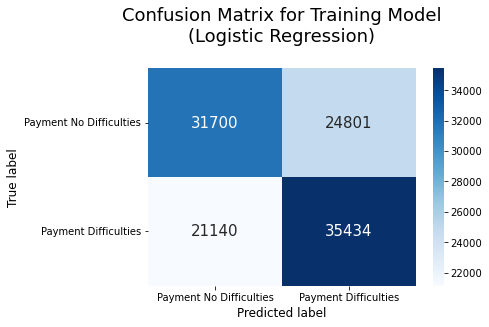

In [18]:
cf_matrix = confusion_matrix(y_test, y_test_pred_log)
labels = ['Payment No Difficulties', 'Payment Difficulties']
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True,annot_kws={'size': 15}, fmt='d',cmap = 'Blues',xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [20]:
acc_logregtrain=round(logreg.score(X_train,y_train)*100,2)
acc_logregtest=round(logreg.score(X_test,y_test)*100,2)
print('Training Accuracy:',acc_logregtrain)
print('Test Accuracy:', acc_logregtest)

Training Accuracy: 59.22
Test Accuracy: 59.37


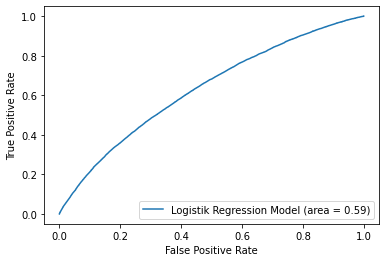

ROC AUC: 0.5937


In [21]:
y_pred_proba_logreg = logreg.predict_proba(X_test)
roc_auc_log = roc_auc_score(y_test, y_test_pred_log)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "Logistik Regression Model (area = %0.2f)" % roc_auc_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

roc_auc_log_score = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log_score)

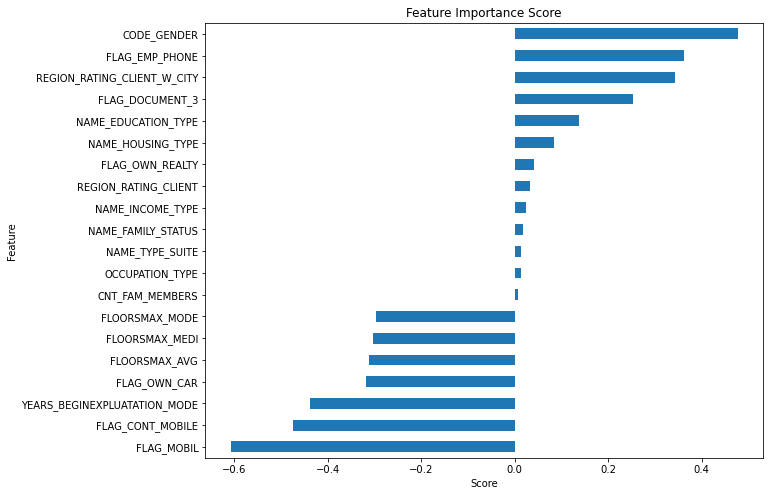

In [56]:
feat_importances = pd.Series(logreg.coef_[0], index=x_blnc.columns)
ax = feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()

In [23]:
feat_importances.abs().sort_values(ascending = False)

FLAG_MOBIL                      0.607598
CODE_GENDER                     0.476890
FLAG_CONT_MOBILE                0.473477
YEARS_BEGINEXPLUATATION_MODE    0.438156
FLAG_EMP_PHONE                  0.360906
REGION_RATING_CLIENT_W_CITY     0.342691
FLAG_OWN_CAR                    0.317452
FLOORSMAX_AVG                   0.312338
FLOORSMAX_MEDI                  0.302065
FLOORSMAX_MODE                  0.296284
FLAG_DOCUMENT_3                 0.252958
NAME_EDUCATION_TYPE             0.136737
NAME_HOUSING_TYPE               0.083268
FLAG_OWN_REALTY                 0.040501
REGION_RATING_CLIENT            0.032941
NAME_INCOME_TYPE                0.024476
NAME_FAMILY_STATUS              0.018290
NAME_TYPE_SUITE                 0.014083
OCCUPATION_TYPE                 0.013968
CNT_FAM_MEMBERS                 0.006013
dtype: float64

## K-Nearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
print(knn)

KNeighborsClassifier(n_neighbors=9)


In [25]:
# prediksi test data
y_test_pred_knn = knn.predict(X_test)

# print classification report
print('Report KNN Testing Model:')
print(classification_report(y_test, y_test_pred_knn))

Report KNN Testing Model:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70     56501
           1       0.69      0.87      0.77     56574

    accuracy                           0.74    113075
   macro avg       0.76      0.74      0.73    113075
weighted avg       0.76      0.74      0.73    113075



[[34379 22122]
 [ 7487 49087]]


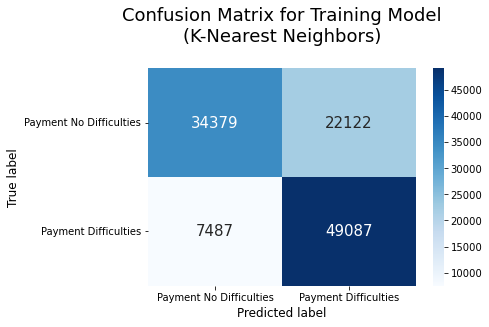

In [37]:
cf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
labels = ['Payment No Difficulties', 'Payment Difficulties']
print(cf_matrix_knn)
sns.heatmap(cf_matrix_knn, annot=True,annot_kws={'size': 15}, fmt='d',cmap = 'Blues',xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [28]:
acc_knntrain=round(knn.score(X_train,y_train)*100,2)
acc_knntest=round(knn.score(X_test,y_test)*100,2)
print('Training Accuracy:',acc_knntrain)
print('Test Accuracy:', acc_knntest)

Training Accuracy: 76.71
Test Accuracy: 73.81


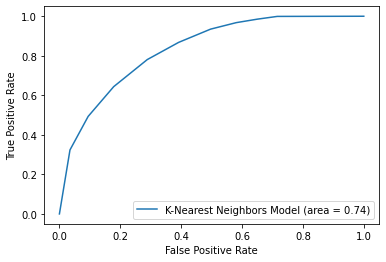

ROC AUC: 0.7381


In [41]:
y_pred_proba_knn = knn.predict_proba(X_test)
roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "K-Nearest Neighbors Model (area = %0.2f)" % roc_auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

roc_auc_knn_score = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn_score)

## Decision Tree

In [30]:
dt = DecisionTreeClassifier(random_state =42)
dt.fit(X_train, y_train)
print(dt)

DecisionTreeClassifier(random_state=42)


In [31]:
# prediksi test data
y_test_pred_dt = dt.predict(X_test)

# print classification report
print('Report Decision Tree Testing Model:')
print(classification_report(y_test, y_test_pred_dt))

Report Decision Tree Testing Model:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     56501
           1       0.79      0.90      0.84     56574

    accuracy                           0.83    113075
   macro avg       0.84      0.83      0.83    113075
weighted avg       0.84      0.83      0.83    113075



[[42534 13967]
 [ 5509 51065]]


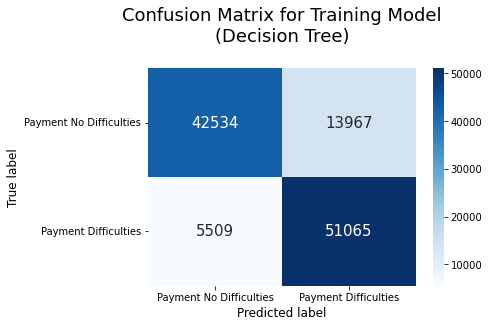

In [33]:
cf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
labels = ['Payment No Difficulties', 'Payment Difficulties']
print(cf_matrix_dt)
sns.heatmap(cf_matrix_dt, annot=True,annot_kws={'size': 15}, fmt='d',cmap = 'Blues',xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [34]:
acc_dttrain=round(dt.score(X_train,y_train)*100,2)
acc_dttest=round(dt.score(X_test,y_test)*100,2)
print('Training Accuracy:',acc_dttrain)
print('Test Accuracy:', acc_dttest)

Training Accuracy: 86.31
Test Accuracy: 82.78


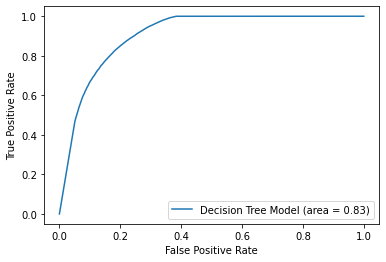

ROC AUC: 0.8277


In [42]:
y_pred_proba_dt = dt.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_test_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "Decision Tree Model (area = %0.2f)" % roc_auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

roc_auc_dt_score = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt_score)

## Random Forest

In [38]:
rf = RandomForestClassifier(random_state =42)
rf.fit(X_train, y_train)
print(rf)

RandomForestClassifier(random_state=42)


In [39]:
# prediksi test data
y_test_pred_rf = rf.predict(X_test)

# print classification report
print('Report Random Forest Testing Model:')
print(classification_report(y_test, y_test_pred_rf))

Report Random Forest Testing Model:
              precision    recall  f1-score   support

           0       0.89      0.78      0.84     56501
           1       0.81      0.91      0.85     56574

    accuracy                           0.85    113075
   macro avg       0.85      0.85      0.84    113075
weighted avg       0.85      0.85      0.84    113075



[[44258 12243]
 [ 5224 51350]]


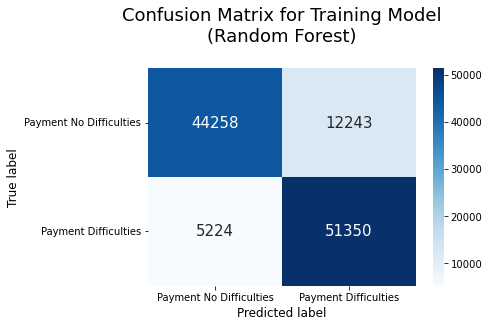

In [40]:
cf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
labels = ['Payment No Difficulties', 'Payment Difficulties']
print(cf_matrix_rf)
sns.heatmap(cf_matrix_rf, annot=True,annot_kws={'size': 15}, fmt='d',cmap = 'Blues',xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [44]:
acc_rftrain=round(rf.score(X_train,y_train)*100,2)
acc_rftest=round(rf.score(X_test,y_test)*100,2)
print('Training Accuracy:',acc_rftrain)
print('Test Accuracy:', acc_rftest)

Training Accuracy: 86.31
Test Accuracy: 84.55


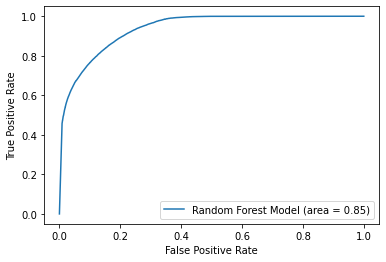

ROC AUC: 0.8455


In [43]:
y_pred_proba_rf = rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "Random Forest Model (area = %0.2f)" % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

roc_auc_rf_score = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf_score)

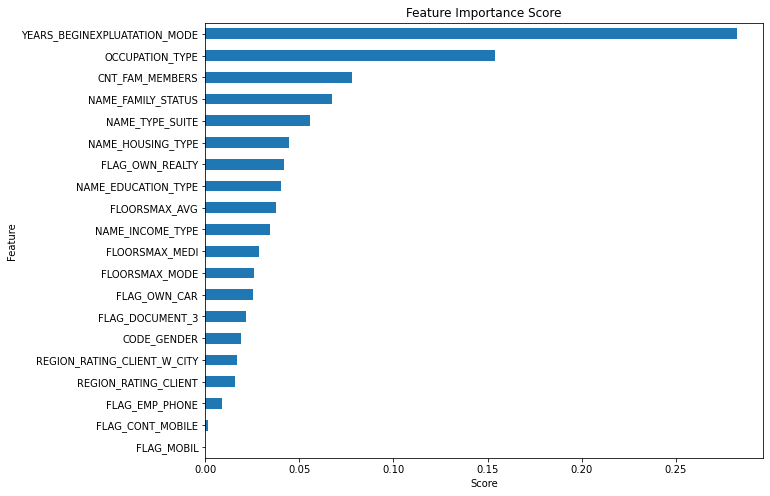

In [58]:
feat_importances = pd.Series(rf.feature_importances_, index=x_blnc.columns)
ax = feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()

## XGBoost

In [45]:
xgb = XGBClassifier(random_state =42)
xgb.fit(X_train, y_train)
print(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [46]:
# prediksi test data
y_test_pred_xgb = xgb.predict(X_test)

# print classification report
print('Report Random Forest Testing Model:')
print(classification_report(y_test, y_test_pred_xgb))

Report Random Forest Testing Model:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63     56501
           1       0.64      0.65      0.64     56574

    accuracy                           0.64    113075
   macro avg       0.64      0.64      0.64    113075
weighted avg       0.64      0.64      0.64    113075



[[35356 21145]
 [19639 36935]]


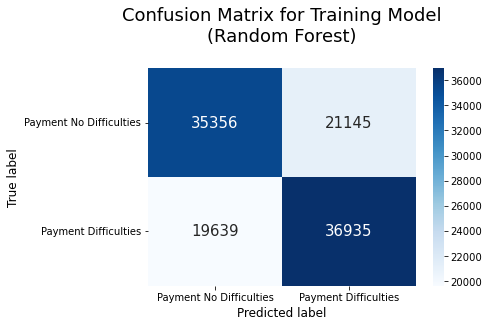

In [47]:
cf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
labels = ['Payment No Difficulties', 'Payment Difficulties']
print(cf_matrix_xgb)
sns.heatmap(cf_matrix_xgb, annot=True,annot_kws={'size': 15}, fmt='d',cmap = 'Blues',xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [50]:
acc_xgbtrain=round(xgb.score(X_train,y_train)*100,2)
acc_xgbtest=round(xgb.score(X_test,y_test)*100,2)
print('Training Accuracy:',acc_xgbtrain)
print('Test Accuracy:', acc_xgbtest)

Training Accuracy: 64.54
Test Accuracy: 63.93


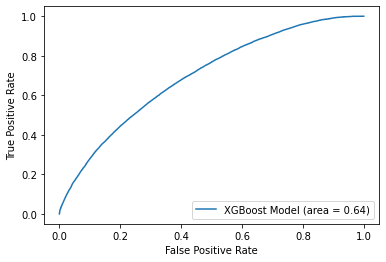

ROC AUC: 0.6393


In [52]:
y_pred_proba_xgb = xgb.predict_proba(X_test)
roc_auc_xgb = roc_auc_score(y_test, y_test_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb[:, 1])

plt.figure()
plt.plot(fpr, tpr, label = "XGBoost Model (area = %0.2f)" % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

roc_auc_xgb_score = round(roc_auc_score(y_test, y_test_pred_xgb),4)
print('ROC AUC:', roc_auc_xgb_score)

# Model Result

In [68]:
results = pd.DataFrame([["Logistic Regression", 0.5922, 0.5937, 0.5937],
                        ["K-Nearest Neighbors", 0.7671, 0.7381, 0.7381],
                        ["Decision Tree", 0.8631, 0.8277, 0.8278],
                        ["Random Forest", 0.8641, 0.8455, 0.8455],
                        ["XGBoost", 0.6454, 0.6393, 0.6393]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Training Accuracy Score','Testing Accuracy Score'], ascending = False).reset_index(drop = True)
            

,Models,Training Accuracy Score,Testing Accuracy Score,ROC AUC Score
0,Random Forest,0.8641,0.8455,0.8455
1,Decision Tree,0.8631,0.8277,0.8278
2,K-Nearest Neighbors,0.7671,0.7381,0.7381
3,XGBoost,0.6454,0.6393,0.6393
4,Logistic Regression,0.5922,0.5937,0.5937


# <center> Prediction <center>

In [3]:
# data test (application_test)
df_test = pd.read_csv('application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print ( 'The test data has %d rows and %d columns'% df_test.shape)

The test data has 48744 rows and 121 columns


In [99]:
df_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

The data train (application train) has 48.744 unique information of loans with 122 features.

## Cleaning Data

In [100]:
# Checking Duplicated Data
df_test.duplicated().sum()

0

## Missing Value

In [101]:
# Checking Missing Value
pd.set_option('display.max_rows', None)
df_test.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [102]:
# Checking Missing Value
pd.set_option('display.max_rows', None)
missing_val2 = pd.DataFrame(df_test.isnull().sum(), columns =['Total Null Values'])
missing_val2 ['Percentage'] = (df_test.isnull().sum()/df_test.shape[0]*100)
print(missing_val2.sort_values(by = 'Percentage', ascending = False). reset_index())
print("There are " + str(missing_val2.loc[missing_val2['Total Null Values'] >0].shape[0]) + "column have missing Value")

                            index  Total Null Values  Percentage
0                  COMMONAREA_AVG              33495   68.716150
1                 COMMONAREA_MODE              33495   68.716150
2                 COMMONAREA_MEDI              33495   68.716150
3         NONLIVINGAPARTMENTS_AVG              33347   68.412523
4        NONLIVINGAPARTMENTS_MODE              33347   68.412523
5        NONLIVINGAPARTMENTS_MEDI              33347   68.412523
6              FONDKAPREMONT_MODE              32797   67.284179
7            LIVINGAPARTMENTS_AVG              32780   67.249302
8           LIVINGAPARTMENTS_MODE              32780   67.249302
9           LIVINGAPARTMENTS_MEDI              32780   67.249302
10                 FLOORSMIN_MEDI              32466   66.605121
11                  FLOORSMIN_AVG              32466   66.605121
12                 FLOORSMIN_MODE              32466   66.605121
13                    OWN_CAR_AGE              32312   66.289184
14                YEARS_B

In [103]:
# We drop column that has > 50% missing value
df_test.drop(missing_val2[missing_val2['Percentage'] > 50].index, axis=1, inplace=True)
df_test.shape

(48744, 92)

In [104]:
df_test.dtypes.value_counts()

int64      40
float64    37
object     15
dtype: int64

In [105]:
pd.set_option('display.max_rows', None)
df_test.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

In [106]:
df_test.shape

(48744, 92)

In [107]:
null2 = df_test.isnull().sum().reset_index()
print (null2)
null_table2 = null2.loc[null2[0] > 0]
print('\n')
print('Number of column have missing value ', null_table2.shape)


                           index      0
0                     SK_ID_CURR      0
1             NAME_CONTRACT_TYPE      0
2                    CODE_GENDER      0
3                   FLAG_OWN_CAR      0
4                FLAG_OWN_REALTY      0
5                   CNT_CHILDREN      0
6               AMT_INCOME_TOTAL      0
7                     AMT_CREDIT      0
8                    AMT_ANNUITY     24
9                AMT_GOODS_PRICE      0
10               NAME_TYPE_SUITE    911
11              NAME_INCOME_TYPE      0
12           NAME_EDUCATION_TYPE      0
13            NAME_FAMILY_STATUS      0
14             NAME_HOUSING_TYPE      0
15    REGION_POPULATION_RELATIVE      0
16                    DAYS_BIRTH      0
17                 DAYS_EMPLOYED      0
18             DAYS_REGISTRATION      0
19               DAYS_ID_PUBLISH      0
20                    FLAG_MOBIL      0
21                FLAG_EMP_PHONE      0
22               FLAG_WORK_PHONE      0
23              FLAG_CONT_MOBILE      0


In [108]:
# Checking column information from feature with 'object' type
for col in df_test.select_dtypes(include = ["object"]).columns:
    print(f'''Value count column {col}:''')
    print(df_test[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F    32678
M    16066
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_TYPE_SUITE:
Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64

Value count column NAME_EDUCATION_TYPE:
Secondary / secondary speci

In [109]:
df_test.CODE_GENDER.replace ('XNA', np.nan, inplace = True)
df_test['ORGANIZATION_TYPE'] = df_test['ORGANIZATION_TYPE'].replace('XNA', np.nan)

In [110]:
for col in df_test.select_dtypes(include = ["object"]).columns:
    print(f'''Value count column {col}:''')
    print(df_test[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F    32678
M    16066
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_TYPE_SUITE:
Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64

Value count column NAME_EDUCATION_TYPE:
Secondary / secondary speci

In [111]:
df_test.select_dtypes(exclude = ['object']).columns.tolist() 

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_

### Imputation

In [112]:
categorical_columns2 = df_test.select_dtypes(include=['object']).columns
numerical_columns2 = df_test.select_dtypes(exclude=['object']).columns

def categorical_imput2 (df_test):
    for i in categorical_columns2:
        df_test[i] = df_test[i].fillna(df_test[i].mode()[0])
    return df_test

def numerical_imput2 (df_test):
    for i in numerical_columns2:
        df_test[i] = df_test[i].fillna(df_test[i].median())
    return df_test
        
def transform_feature2(df_test):
    df_test = categorical_imput2(df_test)
    df_test = numerical_imput2(df_test)
    return df_test

df_test = transform_feature2(df_test)
pd.set_option("display.max_columns", None)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.506771,0.699787,0.610991,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.202145,0.425687,0.519097,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,

In [113]:
df_test.isnull().values.any()

False

## Feature Engineering

In [114]:
df_test['AGE'] = abs(df_test['DAYS_BIRTH']/365)
df_test.drop(columns='DAYS_BIRTH', inplace=True)

df_test['YEARS_EMPLOYED'] = abs(df_test['DAYS_EMPLOYED']/365)
df_test.drop(columns='DAYS_EMPLOYED', inplace=True)

df_test['YEARS_REGISTRATION'] = abs(df_test['DAYS_REGISTRATION']/365)
df_test.drop(columns='DAYS_REGISTRATION', inplace=True)

df_test["YEARS_ID_PUBLISH"] = abs(df_test['DAYS_ID_PUBLISH']/365)
df_test.drop(columns = 'DAYS_ID_PUBLISH',inplace =True)

df_test["YEARS_LAST_PHONE_CHANGE"] = abs(df_test['DAYS_LAST_PHONE_CHANGE']/365)
df_test.drop(columns = 'DAYS_LAST_PHONE_CHANGE',inplace =True)

In [115]:
pd.set_option("display.max_columns", None)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.715068,6.380822,14.164384,2.224658,4.767123
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,49.490411,12.243836,24.980822,4.446575,0.000000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.506771,0.699787,0.610991,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,54.898630,12.213699,5.958904,9.597260,2.345205
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38.290411,5.112329,5.479452,11.528767,4.945205
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.202145,0.425687,0.519097,0.0928,0.9816,0.1379,0.1667,0.0

In [116]:
df_test.to_csv('Df_testclean.csv', index = False)

In [117]:
df_testclean = pd.read_csv('Df_testclean.csv')
df_testclean.shape

(48744, 92)

## Feature Encoding

In [118]:
df_testclean.dtypes.value_counts()

float64    40
int64      37
object     15
dtype: int64

In [119]:
le = LabelEncoder()

# Encode categorical features
for col in df_testclean.select_dtypes (include = ['object']).columns:
    df_testclean[col] = le.fit_transform(df_testclean[col])

In [120]:
pd.set_option("display.max_columns", None)
df_testclean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,0,0.0392,5,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.715068,6.380822,14.164384,2.224658,4.767123
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.564990,0.291656,0.432962,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,49.490411,12.243836,24.980822,4.446575,0.000000
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.506771,0.699787,0.610991,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,54.898630,12.213699,5.958904,9.597260,2.345205
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,0,0.3700,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38.290411,5.112329,5.479452,11.528767,4.945205
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.202145,0.425687,0.519097,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,35.726027,6.002740,10.958904,11.676712,2.249315


## Feature Selection Skipped

In [122]:
df_testclean['CNT_FAM_MEMBERS'] = df_testclean['CNT_FAM_MEMBERS'].astype('int64')
pd.set_option("display.max_columns", None)
df_testclean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,1,1,0,1,0,1,8,2,2,2,5,18,0,0,0,0,0,0,28,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,0,0.0392,5,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.715068,6.380822,14.164384,2.224658,4.767123
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,1,1,0,1,0,0,9,2,2,2,0,9,0,0,0,0,0,0,42,0.564990,0.291656,0.432962,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,49.490411,12.243836,24.980822,4.446575,0.000000
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,1,1,0,1,0,0,4,2,2,2,1,14,0,0,0,0,0,0,54,0.506771,0.699787,0.610991,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,54.898630,12.213699,5.958904,9.597260,2.345205
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,1,1,0,1,1,0,14,4,2,2,6,11,0,0,0,0,0,0,5,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,0,0.3700,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38.290411,5.112329,5.479452,11.528767,4.945205
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,1,1,1,1,0,0,8,3,2,2,0,5,0,0,0,0,1,1,5,0.202145,0.425687,0.519097,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,35.726027,6.002740,10.958904,11.676712,2.249315


In [124]:
numeric_col2 = df_testclean.select_dtypes(include=['float64']).columns.tolist()
numeric_col2

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

In [126]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df_testclean[numeric_col2] = scaler.fit_transform(df_testclean[numeric_col2])

In [127]:
pd.set_option("display.max_columns", None)
df_testclean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100001,0,0,0,1,0,0.024654,0.238037,0.102453,0.184049,6,6,1,1,1,0.257380,1,1,0,1,0,1,8,2,2,2,5,18,0,0,0,0,0,0,28,0.798495,0.923572,0.180263,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,0,0.0392,5,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.666573,0.006374,0.217941,0.127914,0.398991
1,100005,0,1,0,1,0,0.016440,0.080785,0.084558,0.061350,6,6,4,1,1,0.491855,1,1,0,1,0,0,9,2,2,2,0,9,0,0,0,0,0,0,42,0.595809,0.341111,0.490287,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.176471,0.600661,0.012233,0.384369,0.255671,0.000000
2,100013,0,1,1,1,0,0.040054,0.280965,0.378515,0.265849,6,6,1,1,1,0.260854,1,1,0,1,0,0,4,2,2,2,1,14,0,0,0,0,0,0,54,0.532916,0.818463,0.692134,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.142857,0.235294,0.711206,0.012203,0.091687,0.551827,0.196285
3,100028,0,0,0,1,2,0.065721,0.695297,0.262078,0.695297,6,6,4,1,1,0.361760,1,1,0,1,1,0,14,4,2,2,6,11,0,0,0,0,0,0,5,0.553401,0.596110,0.694076,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,0,0.3700,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.176471,0.371731,0.005106,0.084310,0.662886,0.413896
4,100038,0,1,1,0,1,0.034920,0.263804,0.166995,0.263804,6,6,4,1,1,0.135340,1,1,1,1,0,0,8,3,2,2,0,5,0,0,0,0,1,1,5,0.203835,0.497875,0.587946,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,0,0.0707,4,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.117647,0.319315,0.005996,0.168620,0.671393,0.188260


In [128]:
df_testclean.to_csv('df_testcleaningselection.csv', index = False)

In [129]:
df_testcs = pd.read_csv('df_testcleaningselection.csv')
df_testcs.shape

(48744, 92)

# Predict Test Data

In [132]:
# X, Y variabel for modelling (top 20 features)
col_corr2 = ['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_3',
 'FLAG_EMP_PHONE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'YEARS_BEGINEXPLUATATION_MODE']
pred_test = df_testcs[col_corr2]
pred_test.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_EMP_PHONE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLOORSMAX_MODE,FLOORSMAX_AVG,FLOORSMAX_MEDI,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_MODE
0,1,1,1,1,1,1,6,1,6,2,2,0.1250,0.1250,0.1250,8,2,0,0,1,0.9732
1,1,1,1,1,1,1,6,4,6,2,2,0.1667,0.1667,0.1667,9,2,1,0,1,0.9816
2,1,1,0,1,1,1,6,1,6,2,2,0.1667,0.1667,0.1667,4,2,1,1,1,0.9816
3,1,1,1,1,1,1,6,4,6,2,2,0.3750,0.3750,0.3750,14,4,0,0,1,0.9970
4,1,1,1,1,0,1,6,4,6,2,2,0.1667,0.1667,0.1667,8,3,1,1,1,0.9816


In [142]:
predict = pd.Series(rf.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_testcs['SK_ID_CURR'], predict],axis = 1)

results.sample(20)

,SK_ID_CURR,TARGET
47495,447184,0
23348,269749,0
32028,333303,0
21162,253559,0
5329,138968,1
5794,142430,0
41612,405291,0
542,103808,0
33670,345646,0
39613,391820,0


In [140]:
results.shape

(48744, 2)

In [141]:
results.to_csv("predict application.csv", sep=',', header=True, index=False) 